# **ТЕМА: "Анализ оттока клиентов Кредитсервисбанка"**

<div style="border:solid green 2px; padding: 20px">
    
**Цель:** Определить максимально эффективно сегменты отточных клиентов покрывающие максимум проблемных зон банка.

**Заказчик:** отдел маркетинга банка.

**Формат отчета:** [презентация](https://github.com/IGOR-M97/Portfolio/blob/main/KreditserviceBank/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%BE%D1%82%D1%82%D0%BE%D0%BA%D0%B0%20%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2%20%D0%9A%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D0%B1%D0%B0%D0%BD%D0%BA%D0%B0.pdf) и [дашборд](https://public.tableau.com/app/profile/igor.markin/viz/Dashboard_2custom/Dashboard1).

**Причина обращения:** драматический рост отточных клиентов.

*На основе исследования будут приняты маркетинговые воздействия для сокращения числа отточных клиентов.*

**Отточный клиент - клиент, обратившийся в банк с просьбой расторгнуть комплексный договор обслуживания.**</div>

<div style="border:solid yellow 2px; padding: 20px">
    
**Задачи:**
    
   *1. Провести исследовательский анализ, включающий исследование корреляций и портретов клиентов  
    2. Выдвинуть и проверить гипотезы  
    3. Сделать выводы о том, какие признаки стратегически влияют на отток и какие значения или интервалы этих признаков связаны с оттоком  
    4. Выделить немелкие высокоотточные сегменты и приоритезировать их  
    5. Дать рекомендации по приоритетным сегментам  
    6. Подготовить презентацию со всеми ключевыми компонентами  
    7. Построить дашборд*
</div>

<div style="border:solid blue 2px; padding: 20px">

**Декомпозиция задачи:**
    
    1. Загрузка данных, анализ объема данных, просмотр распределения данных  
    2. Анализ и предобработка данных
        2.1 Приведение имен колонок в стандартизированный вид
        2.2 Удаление явных дубликатов записей, выявление дубликатов первичных ключей, а также неявных дубликатов
        2.3 Удаление выбросов
        2.4 Поиск причин пропусков и их заполнение (удаление), взаимопроверка корректности данных
        2.5 Изменение типов данных
        2.6 Кодирование данных путем создания новых колонок для корреляционной матрицы  
    3. Исследовательский анализ данных
        3.1 Подсчет среднего значения оттока клиентов
        3.2 Построение корреляционной матрицы зависимости по кодированным данным
        3.3 Анализ распределения данных в разбивке по отточным/неотточным (в т.ч. по комбинированным признакам)
        3.4 Составление типичных портретов отточных клиентов  
    4. Гипотезы
        4.1 Выдвижение статистической гипотезы 1 и ее проверка
        4.2 Выдвижение статистической гипотезы 2 и ее проверка  
    5. Промежуточный вывод влияния конкретнрых параметров на отток  
    6. Сегментация клиентов
        6.1 Сегмент 1
        6.2 Сегмент 2
        ...
    7. Выводы и рекомендации
    8. Приложения
        8.1 Презентация
        8.2 Дашборд
</div>

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## 1 Загрузка данных, анализ объема данных, просмотр распределения данных

In [2]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную
try:
    df = pd.read_csv('bank_scrooge.csv')
except:
    print('Ошибка чтения данных')

In [3]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<div style="border:solid black 2px; padding: 20px">

**Описание данных:**

Датасет содержит данные о клиентах банка «Кредитсервисбанк». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `equity`  — количество баллов собственности
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `Credit_Card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `est_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

In [4]:
# напишем функцию для ознакомления с данными
def information(data):
    display(data.describe())
    display(data.info())
    display(data.hist(figsize=(10, 10)))
    corr_matrix = data.corr()
    display(corr_matrix.style.background_gradient(cmap='coolwarm'))
    print('Колонки имеют имена:',data.columns.values)
    print('Количество дубликатов записей:',data.duplicated().sum())

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

array([[<AxesSubplot:title={'center':'USERID'}>,
        <AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'equity'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'products'}>],
       [<AxesSubplot:title={'center':'credit_card'}>,
        <AxesSubplot:title={'center':'last_activity'}>,
        <AxesSubplot:title={'center':'EST_SALARY'}>],
       [<AxesSubplot:title={'center':'churn'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
USERID,1.000000,0.009804,0.017795,0.004599,0.006133,-0.004504,0.005674,-0.031029,-0.000369,-0.011928
score,0.009804,1.000000,-0.011814,0.064126,0.235812,-0.004115,-0.094732,-0.031179,0.163866,0.105962
age,0.017795,-0.011814,1.000000,0.020628,0.069745,0.017182,-0.123128,-0.008157,-0.039598,-0.049797
equity,0.004599,0.064126,0.020628,1.000000,0.164126,0.432069,-0.167506,-0.001970,-0.171974,0.270559
balance,0.006133,0.235812,0.069745,0.164126,1.000000,0.075684,-0.059253,0.025004,0.339622,0.085577
products,-0.004504,-0.004115,0.017182,0.432069,0.075684,1.000000,-0.251390,0.037141,-0.118054,0.300964
credit_card,0.005674,-0.094732,-0.123128,-0.167506,-0.059253,-0.251390,1.000000,-0.033445,0.035556,-0.130790
last_activity,-0.031029,-0.031179,-0.008157,-0.001970,0.025004,0.037141,-0.033445,1.000000,0.003039,0.168767
EST_SALARY,-0.000369,0.163866,-0.039598,-0.171974,0.339622,-0.118054,0.035556,0.003039,1.000000,0.001273
churn,-0.011928,0.105962,-0.049797,0.270559,0.085577,0.300964,-0.130790,0.168767,0.001273,1.000000


Колонки имеют имена: ['USERID' 'score' 'city' 'gender' 'age' 'equity' 'balance' 'products'
 'credit_card' 'last_activity' 'EST_SALARY' 'churn']
Количество дубликатов записей: 0


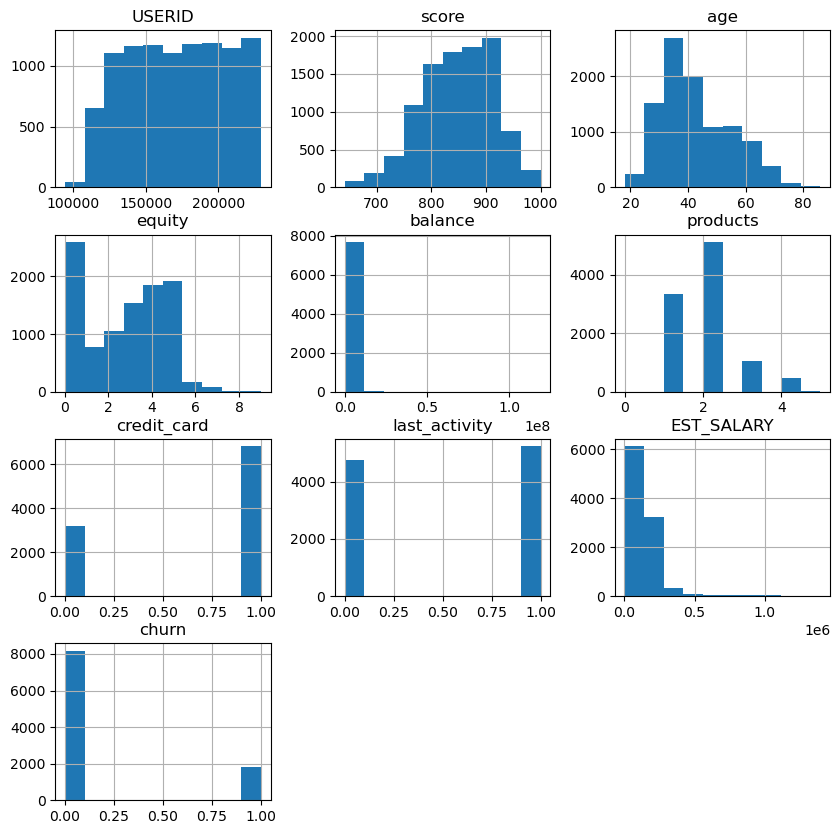

In [5]:
# применим функцию information
information(df)

Дубликатов нет явных, требуется изменить наименования колонок, всего 10_000 записей (клиентов), 2 колонки с пропущенными значениями, у 2 колонок типы не соответствуют данным. Около 20% клиентов хотят отказаться от услуг банка. У 2/3 клиентов есть кредитные карты. Почти половина клиентов не совершали в последние 30 дней каких-либо действий. В est_salary и в balance необходимо посмотреть выбросы.

## 2 Анализ и предобработка данных

### 2.1 Приведение имен колонок в стандартизированный вид

In [6]:
df.columns = df.columns.str.lower()

###  2.2 Удаление явных дубликатов записей, выявление дубликатов первичных ключей, а также неявных дубликатов

Явные дубликаты отсутствуют (писали выше)

In [7]:
# подсчет дубликатов userid
df['userid'].duplicated().sum()

73

In [8]:
# создадим список userid дубликатов
dubl = list(df[df['userid'].duplicated()]['userid'])

# запишем в переменную записи с дублирующимися userid и отсортируем по userid
df_dubl = df.query('@dubl in userid').sort_values(by='userid')

In [9]:
# настроим вывод всех строк
pd.set_option('display.max_rows', None)
# выведем записи с дубликатами
df_dubl

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


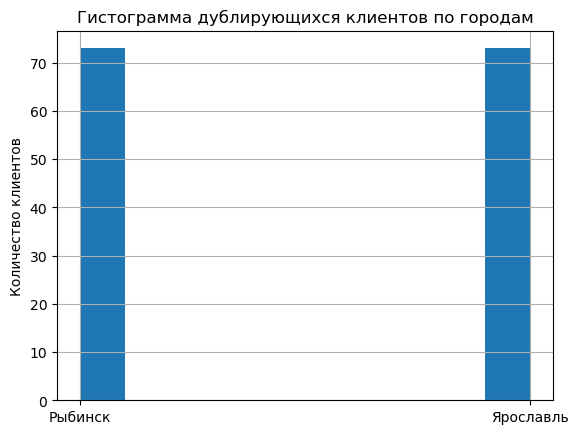

In [10]:
df_dubl['city'].hist()
plt.title('Гистограмма дублирующихся клиентов по городам')
plt.ylabel('Количество клиентов')
plt.show()

In [11]:
# посчитаем сколько дубликатов из Ярославля
df_dubl.query('city == "Ярославль"')['userid'].count()

73

Userid присваиваются уникальными по полям userid и city одновременно, или, если userid является первичным ключом, скорей всего, базы данных городов Рыбинска и Ярославля разные, итоговая таблица рождается путем их слияния. Так как дубликатов всех по одной паре и обязательно фигурируют оба этих города, а значения в других колонках не указывают на какие-либо другие закономерности.

Значит, следует для анализа сохранить дубликаты по userid, т.к. это 2 разных клиента.

### 2.3 Удаление выбросов

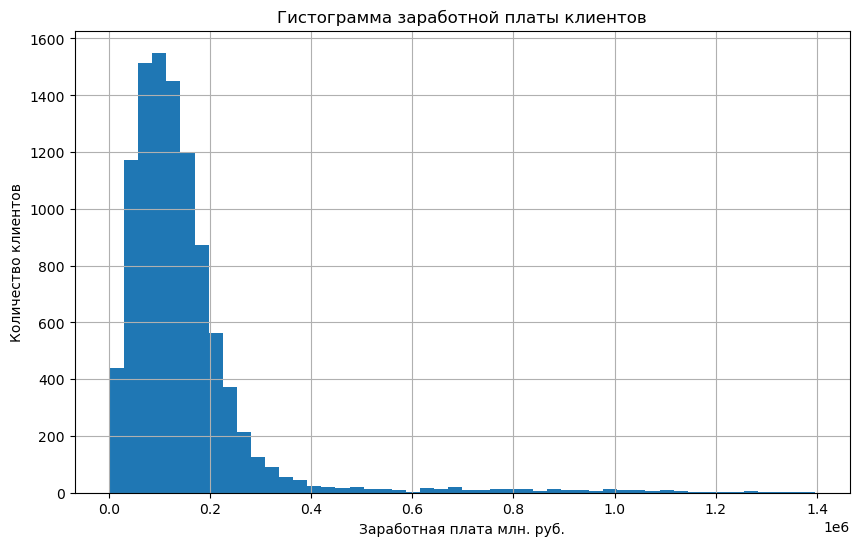

In [12]:
# построение гистограммы заработной платы клиента
plt.figure(figsize=(10,6))
df['est_salary'].hist(bins=50)
plt.title('Гистограмма заработной платы клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Заработная плата млн. руб.')
plt.show()

In [13]:
print(round(df.query('churn == 1')['userid'].count() * 100 / df['userid'].count(), 2), '% отточных клиентов по всему банку')

18.2 % отточных клиентов по всему банку


In [14]:
print(round(df.query('churn == 1 & est_salary > 400_000')['userid'].count()\
            * 100 / df.query('est_salary > 400_000')['userid'].count(), 2),\
      '% отточных клиентов которые зарабатывают более 400_000')

14.84 % отточных клиентов которые зарабатывают более 400_000


Отсечем клиентов, зарабатывающих более 400_000 как выбросы, это не повлияет на исследование.

In [15]:
# проверим распределение по балансу
df = df.query('est_salary < 400_000')

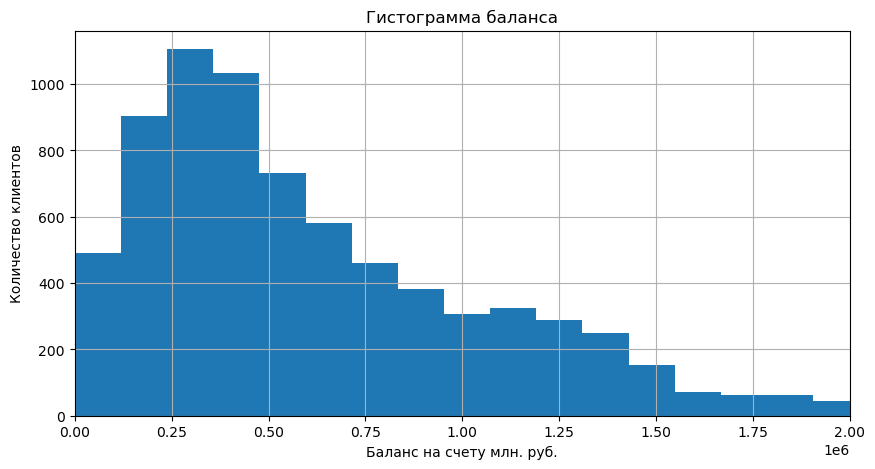

In [16]:
# построение гистограммы баланса клиентов
plt.figure(figsize=(10,5))
df['balance'].hist(bins=1000)
plt.xlim(0,2_000_000)
plt.title('Гистограмма баланса')
plt.ylabel('Количество клиентов')
plt.xlabel('Баланс на счету млн. руб.')
plt.show()

In [17]:
print(round(df.query('churn == 1 & balance > 2_000_000')['userid'].count()\
            * 100 / df.query('balance > 2_000_000')['userid'].count(), 2),\
      '% отточных клиентов которые имеют баланс более 2_000_000')

51.61 % отточных клиентов которые имеют баланс более 2_000_000


Среди клиентов с большим балансом много отточных, поэтому их отбрасывать не будем.

### 2.4 Поиск причин пропусков и их заполнение (удаление), взаимопроверка корректности данных

In [18]:
# для начала посчитаем долю пропусков в колонке age
print((df['userid'].count() - df['age'].count()) / df['userid'].count() * 100,'%')


0.24837007140639553 %


В колонке age незначительно пропусков, на исследование, вероятно, это не повлияет.

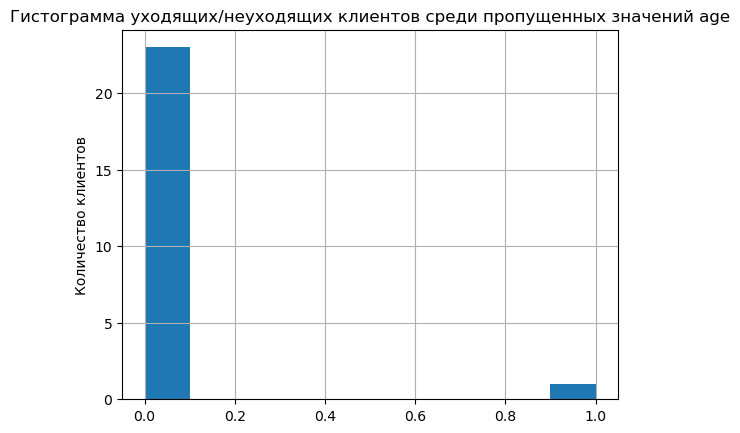

In [19]:
# проверим сколько людей уходят среди пропущенных значений age
df[df['age'].isna()]['churn'].hist(bins=10)
plt.title('Гистограмма уходящих/неуходящих клиентов среди пропущенных значений age')
plt.ylabel('Количество клиентов')
plt.show()

Удалим записи с пропущенными значениями age.

In [20]:
df = df[df['age'].notna()].reset_index(drop=True)

In [21]:
# затем посчитаем долю пропусков в колонке balance
print((df['userid'].count() - df['balance'].count()) / df['userid'].count() * 100,'%')

21.402635128125326 %


В колонке balance большая доля пропусков.

In [22]:
# проверим есть ли баланс "0"
df.query('balance == 0')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3774,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6526,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


In [23]:
# установим пропущенные значения по таким же параметрам
df[df['balance'].isna()].query('gender == "М" and products == 2 and city == "Ярославль" and credit_card == 1 and churn == 0')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
33,205226,944.0,Ярославль,М,35.0,0,NaN,2,1,1,239843.39,0
107,206691,948.0,Ярославль,М,27.0,0,NaN,2,1,0,104081.58,0
243,141960,718.0,Ярославль,М,48.0,0,NaN,2,1,1,123443.86,0
284,212688,697.0,Ярославль,М,30.0,0,NaN,2,1,0,270318.69,0
398,226216,917.0,Ярославль,М,33.0,1,NaN,2,1,0,243132.81,0
1260,152347,916.0,Ярославль,М,32.0,0,NaN,2,1,1,181148.03,0
1507,226754,873.0,Ярославль,М,37.0,0,NaN,2,1,0,95652.98,0
1772,164894,706.0,Ярославль,М,21.0,0,NaN,2,1,1,70385.67,0
1836,123438,705.0,Ярославль,М,36.0,0,NaN,2,1,1,222891.98,0
2087,149947,907.0,Ярославль,М,64.0,0,NaN,2,1,1,149052.51,0


Есть только 2 значения с нулевым балансом и много пропущенных значений с теми же параметрами.

Заполним колонку balance значением 0, т.к. скорей всего это клиенты имеющие баланс "0", но в дальнейшем оговорим это в исследовании.

In [24]:
df['balance'] = df['balance'].fillna(0)

In [25]:
# проверка некорректности количества продуктов
df.query('credit_card == 1 and products == 0')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


In [26]:
# проверка некорректности количества продуктов
df.query('products == 0')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8637,147837,962.0,Рыбинск,Ж,79.0,3,0.0,0,0,0,25063.96,1


In [27]:
# удалим эту запись
df = df.drop(index=[8637])

In [28]:
# проверим корректность удаления
df.query('products == 0')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


###  2.5 Изменение типов данных

In [29]:
df['score'] = df['score'].astype('int')
df['age'] = df['age'].astype('int')

In [30]:
# проверка работы
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9638 entries, 0 to 9638
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9638 non-null   int64  
 1   score          9638 non-null   int32  
 2   city           9638 non-null   object 
 3   gender         9638 non-null   object 
 4   age            9638 non-null   int32  
 5   equity         9638 non-null   int64  
 6   balance        9638 non-null   float64
 7   products       9638 non-null   int64  
 8   credit_card    9638 non-null   int64  
 9   last_activity  9638 non-null   int64  
 10  est_salary     9638 non-null   float64
 11  churn          9638 non-null   int64  
dtypes: float64(2), int32(2), int64(6), object(2)
memory usage: 903.6+ KB


Датасет отредактировали, теперь с ним можно работать, 3.61% данных мы из него выкинули.

### 2.6 Кодирование данных путем создания новых колонок для корреляционной матрицы

In [31]:
# сохраним исходную таблицу
data = df.copy()

In [32]:
# сохраним столбец gender создав новый с именем sex
df['sex'] = df['gender']

# выполним кодирование пола путем замены колонки
df = pd.get_dummies(df, columns=['gender'], drop_first = True)

In [33]:
# настроим вывод 10 строк
pd.set_option('display.max_rows', 10)

In [34]:
# сохраним столбец city создав новый с именем town
df['town'] = df['city']


# закодируем город клиента
df = pd.get_dummies(df, columns=['city'])
df

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,sex,gender_М,town,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850,25,1,59214.82,2,0,1,75719.14,1,Ж,0,Рыбинск,0,1,0
1,146556,861,37,5,850594.33,3,1,0,86621.77,0,Ж,0,Рыбинск,0,1,0
2,120722,892,30,0,0.00,1,1,1,107683.34,0,Ж,0,Рыбинск,0,1,0
3,225363,866,51,5,1524746.26,2,0,1,174423.53,1,Ж,0,Ярославль,0,0,1
4,157978,730,34,5,174.00,1,1,0,67353.16,1,М,1,Ярославль,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9634,120553,814,27,1,78144.65,1,0,1,18943.64,0,М,1,Рыбинск,0,1,0
9635,139170,894,46,0,0.00,1,1,0,196898.29,0,М,1,Ярославль,0,0,1
9636,115639,903,24,0,0.00,2,1,1,108905.09,0,М,1,Ярославль,0,0,1
9637,148700,777,68,3,865457.97,3,0,1,86874.90,0,Ж,0,Ярославль,0,0,1


## 3 Исследовательский анализ данных

### 3.1 Подсчет среднего значения оттока клиентов

In [35]:
print(round(df.query('churn == 1')['userid'].count() * 100 / df['userid'].count(), 2), '% отточных клиентов по всему банку')

18.34 % отточных клиентов по всему банку


### 3.2 Построение корреляционной матрицы зависимости по кодированным данным

In [36]:
# построим новые столбцы отдельно для мужчин из разных городов
df['M&Ростов'] = df['gender_М'] * df['city_Ростов']
df['M&Рыбинск'] = df['gender_М'] * df['city_Рыбинск']
df['M&Ярославль'] = df['gender_М'] * df['city_Ярославль']

In [37]:
cor_matrix = df.corr()
display(cor_matrix.style.background_gradient(cmap='coolwarm'))

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,city_Ростов,city_Рыбинск,city_Ярославль,M&Ростов,M&Рыбинск,M&Ярославль
userid,1.000000,0.006646,0.021830,0.004305,-0.007097,-0.005737,0.007348,-0.032448,0.006077,-0.012915,0.030535,-0.033210,0.013082,0.011968,-0.024823,0.012182,0.038330
score,0.006646,1.000000,-0.011770,0.057060,0.103675,-0.007116,-0.086965,-0.031257,0.197244,0.104075,0.004430,-0.033867,0.004794,0.019910,-0.016738,-0.003961,0.017175
age,0.021830,-0.011770,1.000000,0.023254,0.081775,0.020297,-0.125136,-0.009847,-0.068980,-0.049168,-0.212864,0.048234,0.027044,-0.058897,-0.035907,-0.068829,-0.162139
equity,0.004305,0.057060,0.023254,1.000000,0.244965,0.419822,-0.160208,-0.003460,-0.179057,0.259980,-0.021898,0.028940,-0.004879,-0.016308,0.024204,-0.010464,-0.029791
balance,-0.007097,0.103675,0.081775,0.244965,1.000000,0.157469,-0.076529,0.010548,0.061501,0.123104,0.021801,-0.015254,-0.015788,0.025150,-0.008119,-0.008698,0.034917
products,-0.005737,-0.007116,0.020297,0.419822,0.157469,1.000000,-0.251394,0.037561,-0.120533,0.296258,-0.024405,-0.013589,-0.040759,0.046473,-0.011989,-0.023862,-0.002310
credit_card,0.007348,-0.086965,-0.125136,-0.160208,-0.076529,-0.251394,1.000000,-0.034083,0.019029,-0.129093,0.129236,-0.096395,-0.051460,0.115373,-0.028201,0.004379,0.154248
last_activity,-0.032448,-0.031257,-0.009847,-0.003460,0.010548,0.037561,-0.034083,1.000000,-0.018350,0.166769,-0.016189,0.007906,0.049742,-0.050507,-0.003447,0.030105,-0.038197
est_salary,0.006077,0.197244,-0.068980,-0.179057,0.061501,-0.120533,0.019029,-0.018350,1.000000,0.037812,0.120158,-0.107524,-0.045761,0.118197,-0.042988,0.028159,0.134901
churn,-0.012915,0.104075,-0.049168,0.259980,0.123104,0.296258,-0.129093,0.166769,0.037812,1.000000,0.142937,0.001861,-0.029146,0.024948,0.050382,0.047405,0.093281


Корреляция отточных клиентов с количеством продуктов 0.29, с количеством баллов собственности 0.26, с активностью последние 30 дней 0.17. Мало.

### 3.3 Анализ распределения данных в разбивке по отточным/неотточным (в т.ч. по комбинированным признакам)

In [38]:
# выведем рабочий датасет для третьей главы
data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9634,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0
9635,139170,894,Ярославль,М,46,0,0.00,1,1,0,196898.29,0
9636,115639,903,Ярославль,М,24,0,0.00,2,1,1,108905.09,0
9637,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0


#### Поиск зависимостей по половой принадлежности и городу

In [39]:
# создадим сводную таблицу по городу и полу
data_gender_city = data.pivot_table(index=['gender','city'], values='churn', aggfunc=['sum','count']).reset_index()

In [40]:
# посчитаем долю отточных
data_gender_city['percent'] = round(data_gender_city[('sum', 'churn')] / data_gender_city[('count', 'churn')], 2)

In [41]:
data_gender_city

,gender,city,sum,count,percent
,,,churn,churn,
0,Ж,Ростов,88,728,0.12
1,Ж,Рыбинск,137,1337,0.10
2,Ж,Ярославль,397,2779,0.14
3,М,Ростов,172,676,0.25
4,М,Рыбинск,294,1276,0.23
5,М,Ярославль,680,2842,0.24


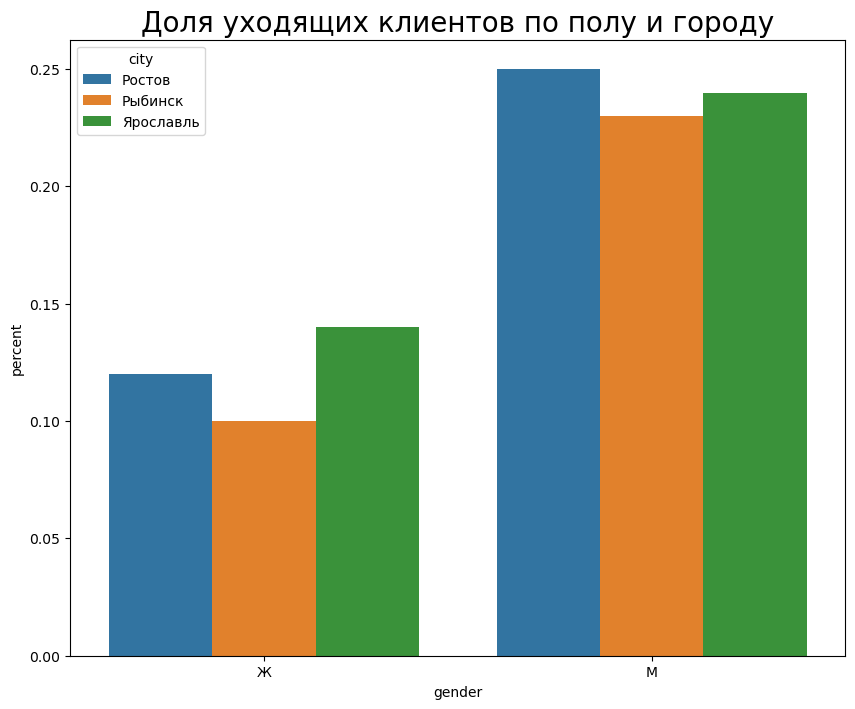

In [42]:
# построим гистограмму
plt.figure(figsize=(10,8))
sns.barplot(y='percent', x='gender', hue='city', data=data_gender_city)
plt.title('Доля уходящих клиентов по полу и городу', size=20)
plt.show()

Явно видно, что среди мужчин доля уходящих больше, от города отток практически не зависит.

Но чуть больше мужчин уходит из Ростова, а женщин - из Ярославля.

In [43]:
# создадим функцию подсчета доли уходящих по параметрам
def gone(ex):
    return print(ex['userid'].count(), 'всего клиентов в выборке', \
                 round(ex.query('churn == 1')['userid'].count() / ex['userid'].count(), 2), 'доля уходящих')

In [44]:
# подсчет уходящих среди мужчин
gone(data.query('gender == "М"'))

4794 всего клиентов в выборке 0.24 доля уходящих


In [45]:
# подсчет уходящих среди женщин
gone(data.query('gender == "Ж"'))

4844 всего клиентов в выборке 0.13 доля уходящих


#### Поиск зависимостей по возрасту

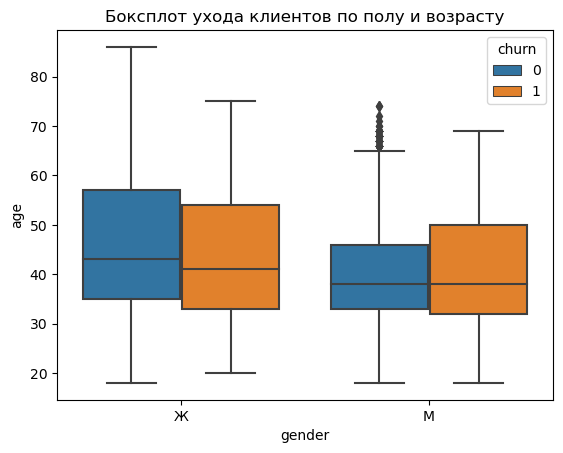

In [46]:
# построим ящик с усами
sns.boxplot(data=data, x='gender', y='age', hue='churn')
plt.title('Боксплот ухода клиентов по полу и возрасту')
plt.show()

Женщины обычно оттекают чуть моложе, медианный возраст мужчин из тех кто остался и тех кто уходит одинаковый. Удивительная особенность: более старшие мужчины чаще уходят, а женщины более старшие - наоборот остаются.

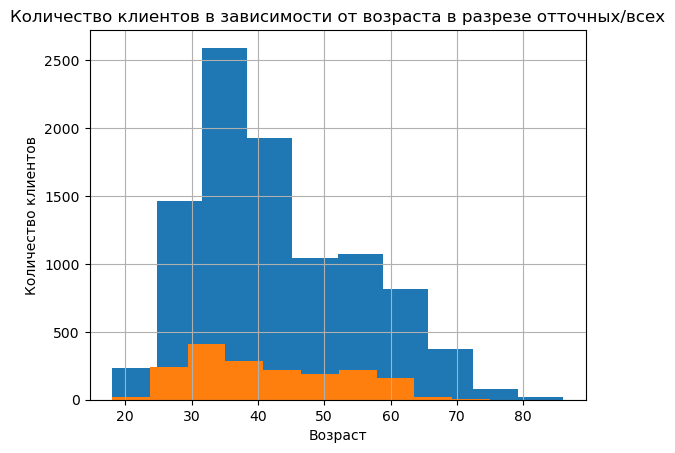

In [47]:
data['age'].hist()
data.query('churn == 1')['age'].hist()
plt.title('Количество клиентов в зависимости от возраста в разрезе отточных/всех')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

Не видно явных зависимостей от возраста.

#### Поиск зависимостей по количеству баллов собственности

Ж пол


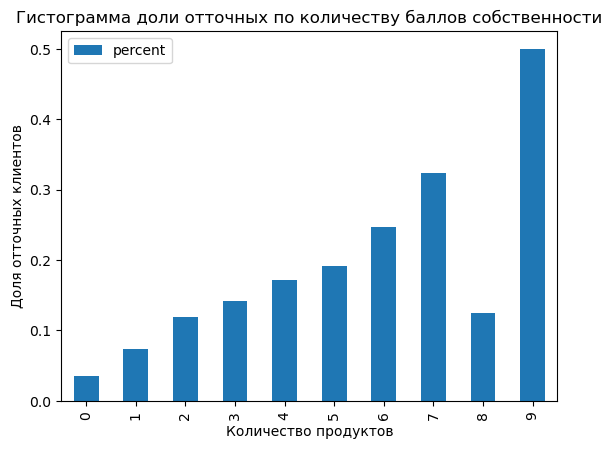

М пол


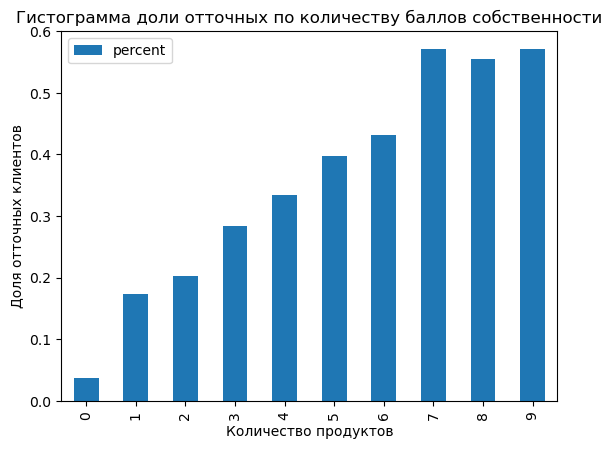

In [48]:
# построим график в зависимости от пола
for sex in data['gender'].unique():
    print(sex, 'пол')
    data_equity = data.query('gender == @sex').\
    pivot_table(index='equity', values='churn', aggfunc=['sum','count']).reset_index()
    data_equity['percent'] = data_equity[('sum', 'churn')] / data_equity[('count', 'churn')]
    data_equity.plot(kind='bar', y='percent')
    plt.title('Гистограмма доли отточных по количеству баллов собственности')
    plt.xlabel('Количество продуктов')
    plt.ylabel('Доля отточных клиентов')
    plt.show()

In [49]:
# посчитаем количество клиентов в каждой выборке
for x in range(10):
    for sex in data['gender'].unique():
        print()
        print(x, 'баллов')
        print(sex, 'пол')
        print(data.query('equity == @x & gender == @sex')['userid'].count(), 'всего клиентов выборки')


0 баллов
Ж пол
1095 всего клиентов выборки

0 баллов
М пол
1276 всего клиентов выборки

1 баллов
Ж пол
393 всего клиентов выборки

1 баллов
М пол
368 всего клиентов выборки

2 баллов
Ж пол
546 всего клиентов выборки

2 баллов
М пол
497 всего клиентов выборки

3 баллов
Ж пол
825 всего клиентов выборки

3 баллов
М пол
696 всего клиентов выборки

4 баллов
Ж пол
942 всего клиентов выборки

4 баллов
М пол
876 всего клиентов выборки

5 баллов
Ж пол
923 всего клиентов выборки

5 баллов
М пол
935 всего клиентов выборки

6 баллов
Ж пол
69 всего клиентов выборки

6 баллов
М пол
88 всего клиентов выборки

7 баллов
Ж пол
37 всего клиентов выборки

7 баллов
М пол
42 всего клиентов выборки

8 баллов
Ж пол
8 всего клиентов выборки

8 баллов
М пол
9 всего клиентов выборки

9 баллов
Ж пол
6 всего клиентов выборки

9 баллов
М пол
7 всего клиентов выборки


Чем больше баллов собственности, тем больше клиентов уходит, 6-9 баллов не в счет - малая выборка.

Поэтому 5 и более баллов собственности объединим в одну группу.

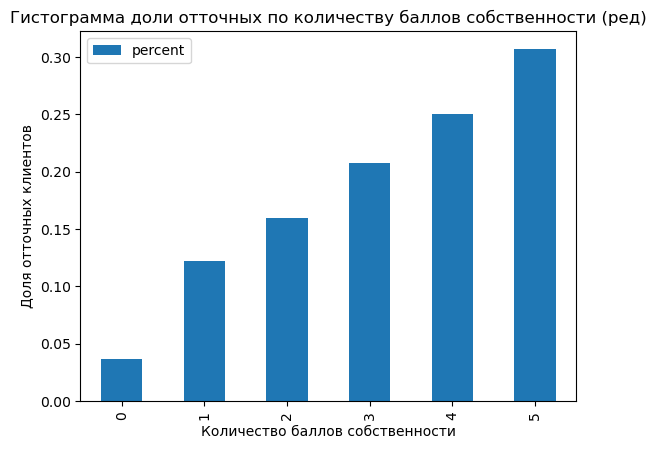

In [50]:
data['equity'] = data['equity'].replace({6:5,7:5,8:5,9:5})
data_equity = data.pivot_table(index='equity', values='churn', aggfunc=['sum','count']).reset_index()
data_equity['percent'] = data_equity[('sum', 'churn')] / data_equity[('count', 'churn')]

# выведем измененный график
data_equity.plot(kind='bar', y='percent')
plt.title('Гистограмма доли отточных по количеству баллов собственности (ред)')
plt.xlabel('Количество баллов собственности')
plt.ylabel('Доля отточных клиентов')
plt.show()

Отток прямо пропорционален количеству продуктов клиентов. Нам интересны группы от третьей - т.к. отток здесь выше среднего.

#### Поиск зависимостей по балансу на счету

Необходимо напомнить, что пропущенные значения были заполнены нулем, т.е. пустым балансом - это не факт, а предположение.

In [51]:
gone(data.query('balance == 0'))

2064 всего клиентов в выборке 0.0 доля уходящих


Среди клиентов в спропущенным балансом нет уходящих.

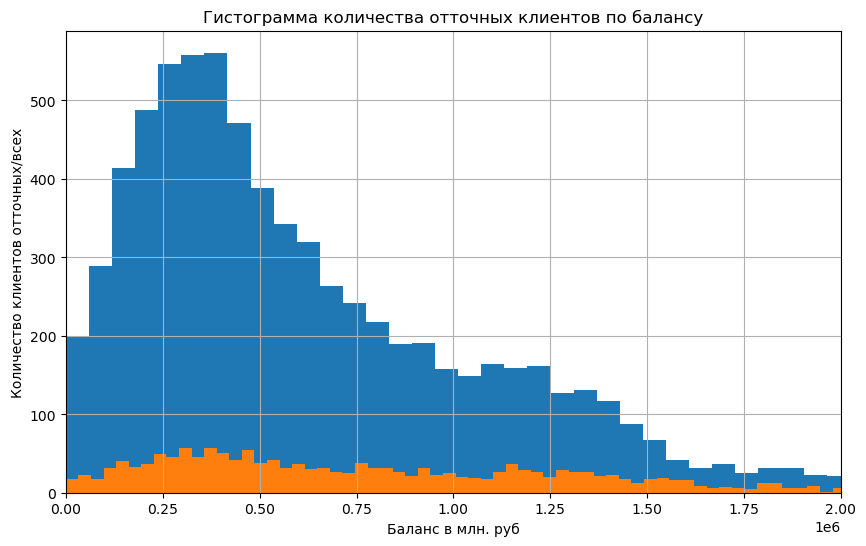

In [52]:
# построим гистограмму ограничившись 2 млн рублей, после 2 млн. мы зныем отток составляет 50%
plt.figure(figsize=(10,6))
data.query('balance != 0')['balance'].hist(bins=2000)
data.query('balance != 0 and churn == 1')['balance'].hist(bins=2000)
plt.xlim(0,2_000_000)
plt.title('Гистограмма количества отточных клиентов по балансу')
plt.xlabel('Баланс в млн. руб')
plt.ylabel('Количество клиентов отточных/всех')
plt.show()

In [53]:
# здесь мы посчитаем долю ушедших в зависимости от баланса
# для этого создадим пустые списки
list_percentgone = [] # для оси y
x_line = [] # для оси х
count = [] # для количества человек в выборке

# заполним списки значениями, где отток будет у клиентов при балансе больше указанной суммы
for x in range(50_000, 2_000_000, 50_000):
    list_percentgone.append(round(data.query('churn == 1 and balance > @x')['userid'].count() \
                                  / data.query('balance > @x')['userid'].count(), 2))
    x_line.append(x)
    count.append(data.query('balance > @x')['userid'].count())

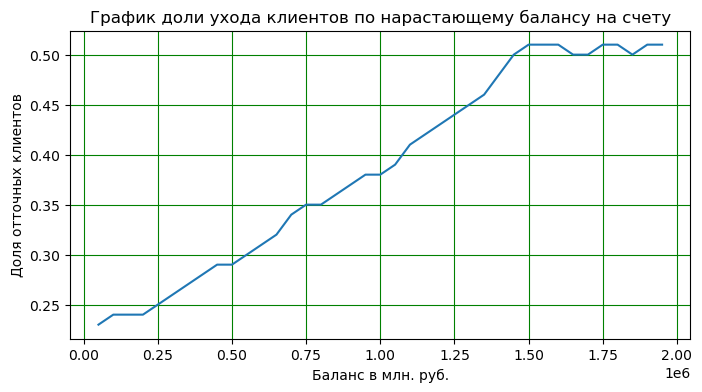

In [54]:
# построим график
plt.figure(figsize=(8,4))
plt.plot(x_line, list_percentgone)
plt.title('График доли ухода клиентов по нарастающему балансу на счету')
plt.ylabel('Доля отточных клиентов')
plt.xlabel('Баланс в млн. руб.')
plt.grid(color='g', linestyle='-')
plt.show()

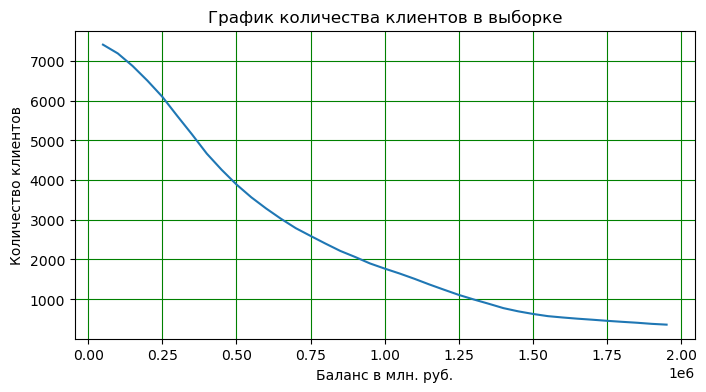

In [55]:
# построим график
plt.figure(figsize=(8,4))
plt.plot(x_line, count)
plt.title('График количества клиентов в выборке')
plt.ylabel('Количество клиентов')
plt.xlabel('Баланс в млн. руб.')
plt.grid(color='g', linestyle='-')
plt.show()

Репрезентативная выборка до 1.3 млн рублей.
Доля отточных клиентов с ростом баланса прямо пропорциональна.

In [56]:
# создадим списки для графика, как делали выше, но для групп разбитых по 200_000
c = 0
mn = []
list = []
for y in range(200_000,2_200_000,200_000):
    mn.append(data.query('balance <= @y and balance > @c')['userid'].count())
    list.append(data.query('churn == 1 and balance <= @y and balance > @c')['userid'].count() / mn[-1])
    c = y

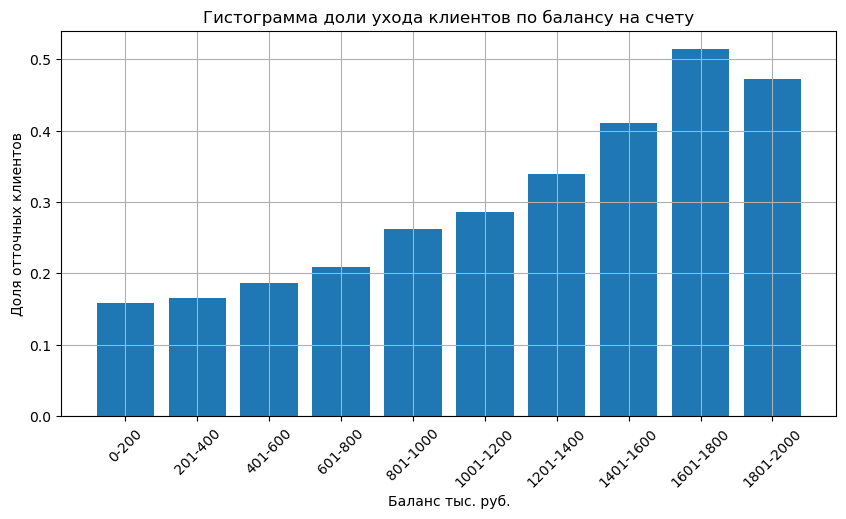

In [57]:
x_list = ['0-200','201-400','401-600','601-800','801-1000','1001-1200','1201-1400',\
          '1401-1600','1601-1800','1801-2000'] # а именно по таким значениям разбиваем

# построим график
plt.figure(figsize=(10,5))
plt.bar(x_list, list)
plt.title('Гистограмма доли ухода клиентов по балансу на счету')
plt.ylabel('Доля отточных клиентов')
plt.xlabel('Баланс тыс. руб.')
plt.grid()
plt.xticks(rotation=45)
plt.show()

От 600_000 с балансом клиентов можно уже считать более отточными.

#### Поск зависимостей по количеству продуктов

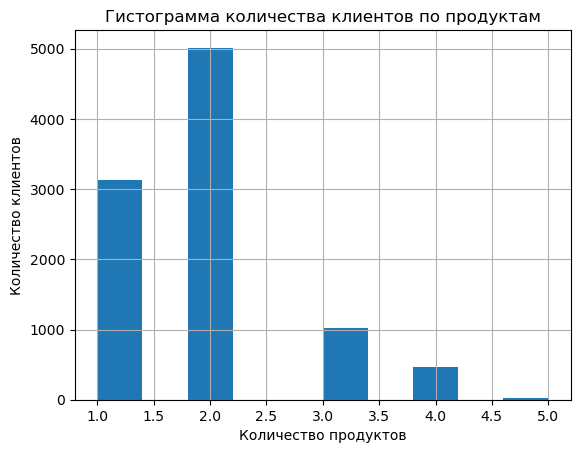

In [58]:
data['products'].hist(bins=10)
plt.title('Гистограмма количества клиентов по продуктам')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество продуктов')
plt.show()

In [59]:
# проверим сколько всего клиентов в выборке
gone(data.query('products == 4 or products == 5'))

478 всего клиентов в выборке 0.62 доля уходящих


In [60]:
# количество продуктов где более 3ех добавим в группу 3
data['products'] = data['products'].replace({5:3,4:3})

In [61]:
# создадим 2 списка для дальнейшего построения гистограммы
y_product = []
x_label = []
for product in data['products'].unique():
    y_product.append(data.query('products == @product and churn == 1')['userid']\
                     .count() / data.query('products == @product')['userid'].count())
    x_label.append(product)

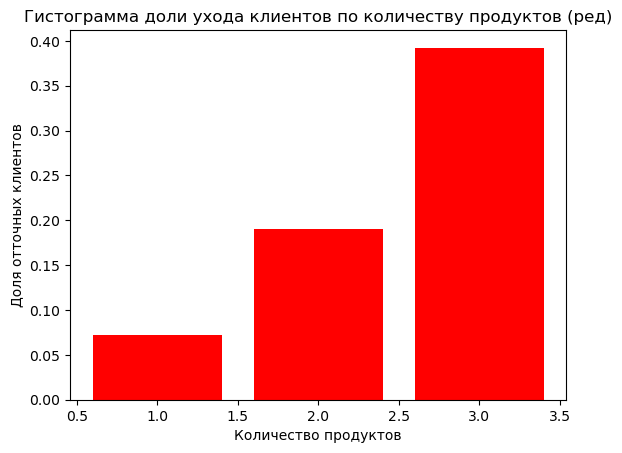

In [62]:
# построим график
plt.bar(x_label, y_product, color='r')
plt.title('Гистограмма доли ухода клиентов по количеству продуктов (ред)')
plt.ylabel('Доля отточных клиентов')
plt.xlabel('Количество продуктов')
plt.show()

С ростом числа продуктов отток клиентов повышается, клиенты с 3-мя продуктами и более находятся в большей зоне риска ухода.

#### Поск зависимостей по заработной плате

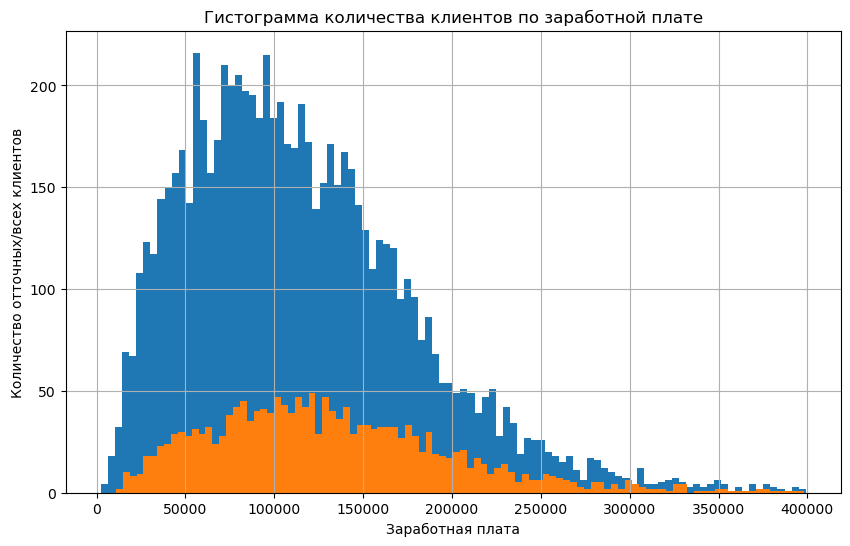

In [63]:
plt.figure(figsize=(10,6))
data.query('balance != 0')['est_salary'].hist(bins=100)
data.query('balance != 0 and churn == 1')['est_salary'].hist(bins=100)
plt.title('Гистограмма количества клиентов по заработной плате')
plt.ylabel('Количество отточных/всех клиентов')
plt.xlabel('Заработная плата')
plt.show()

In [64]:
# создадим списки для графика, как делали выше, но для групп разбитых по 50_000
c = 0
mn = []
list = []
for y in range(50_000,450_000,50_000):
    mn.append(data.query('balance != 0 and est_salary <= @y and est_salary > @c')['userid'].count())
    list.append(data.query('balance != 0 and churn == 1 and est_salary <= @y and est_salary > @c')['userid'].count() / mn[-1])
    c = y

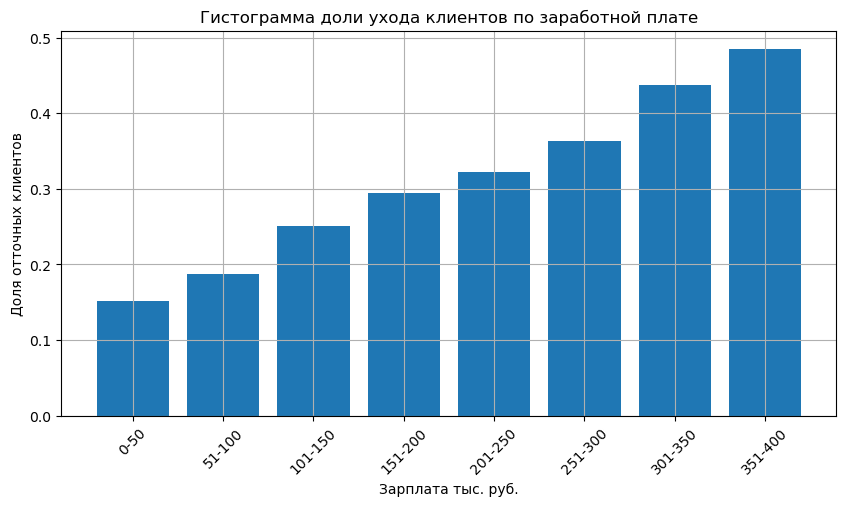

In [65]:
x_list = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400'] # а именно по таким значениям разбиваем

# построим график
plt.figure(figsize=(10,5))
plt.bar(x_list, list)
plt.title('Гистограмма доли ухода клиентов по заработной плате')
plt.ylabel('Доля отточных клиентов')
plt.xlabel('Зарплата тыс. руб.')
plt.grid()
plt.xticks(rotation=45)
plt.show()

Такая же ситуация и с зависимостью зарплат клиентов от вероятности их ухода - прямая пропорциональность. Наиболее подверженные уходу будем считать клиентов с указанной зарплатой от 100_000 рублей.

#### Поск взаимозависимостей по активности и наличию кредитной карты

In [66]:
# обратимся к нашей функции
gone(data.query('credit_card == 0'))
gone(data.query('credit_card == 1'))

3102 всего клиентов в выборке 0.26 доля уходящих
6536 всего клиентов в выборке 0.15 доля уходящих


In [67]:
gone(data.query('last_activity == 0'))
gone(data.query('last_activity == 1'))

4616 всего клиентов в выборке 0.12 доля уходящих
5022 всего клиентов в выборке 0.25 доля уходящих


Наиболее подвержены уходу клиенты без кредитной карты 26%, когда у клиентов с кредитной картой вероятность уйти 15%.

Доля уходящих, среди тех кто за последние 30 дней хотя бы раз совершал какое-либо действие, 25%, среди неактивных - 12%.

#### Поск взаимозависимостей по кредитному рейтингу

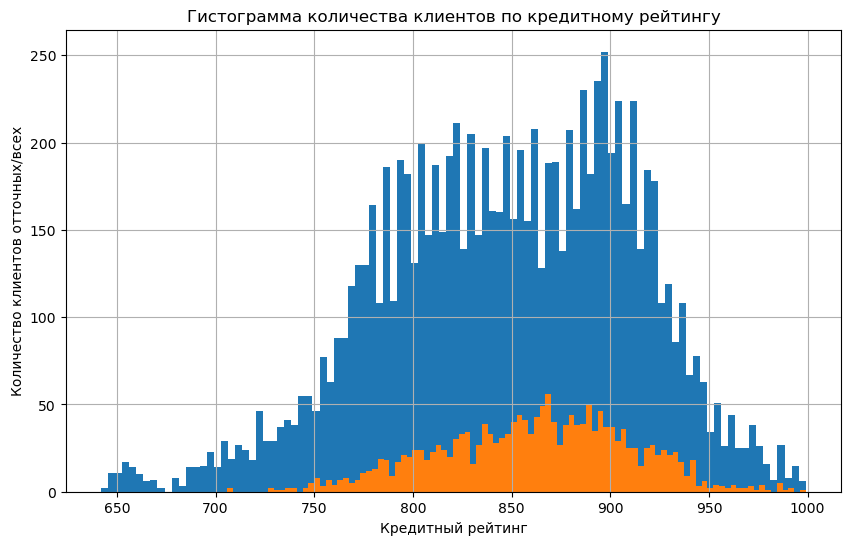

In [68]:
plt.figure(figsize=(10,6))
data['score'].hist(bins=100)
data.query('churn == 1')['score'].hist(bins=100)
plt.title('Гистограмма количества клиентов по кредитному рейтингу')
plt.ylabel('Количество клиентов отточных/всех')
plt.xlabel('Кредитный рейтинг')
plt.show()

Существенных зависимостей не наблюдается.

### 3.4 Составление типичных портретов отточных клиентов

In [69]:
data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9634,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0
9635,139170,894,Ярославль,М,46,0,0.00,1,1,0,196898.29,0
9636,115639,903,Ярославль,М,24,0,0.00,2,1,1,108905.09,0
9637,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0


In [70]:
gone(data.query('balance == 0'))

2064 всего клиентов в выборке 0.0 доля уходящих


Запишем в вывод отдельный пункт, касающегося клиентов с отсутствующим балансом.

В перую очередь это клиенты с большим капиталом, с последней активностью за последние 30 дней, преимущественно мужского пола. Также стоит уточнить, что отток растет с число используемых продуктов клиентами.

## 4 Проверка гипотез

### 4.1 Гипотеза первая. О различии дохода между клиентами отточными / неотточными

H0: Доход клиентов с churn == 0 РАВЕН доходу клиентов с churn == 1.

H1: Доход клиентов с churn == 0 НЕ РАВЕН доходу клиентов с churn == 1.

In [71]:
# проверим размер выборок
gone(data.query('churn == 1'))
gone(data.query('churn == 0'))

1768 всего клиентов в выборке 1.0 доля уходящих
7870 всего клиентов в выборке 0.0 доля уходящих


Проверять гипотезы будем Ттестом, т.к. этот тест подходит для сравнения средних двух генеральных совокупностей, как у нас.

Выбоки делать не будем, рассчитаем на основе генеральных совокупностей 1768 и 7870 значений соответственно.

Мы можем применить Ттест потому, что:

    Генеральные совокупности не зависят друг от друга - это абсолютно разные клиенты;
    Выборочные средние нормально распределены, т.к. вместо выборок мы исрользуем всю генеральную совокупность;
    Выборки достаточно большие (от 1768 значений), но при этом очень разные по размеру, поэтому усомнимся в равной дисперсии выборок и укажем параметр equal_var = False.
    
Уровень статистической значимости 0.01 выберем исходя из возможности отвергнуть нулевую гипотезу с меньшей вероятностью ошибки (в 1%) и компромиссу получить верный результат с другой стороны.

In [72]:
# проведем ttest о равенстве средних генеральных совокупностей
sample_1 = data.query('churn == 1')['est_salary']
sample_2 = data.query('churn == 0')['est_salary']

alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.00015606211182171226
Отвергаем нулевую гипотезу


Доходы уходящих клиентов и не уходящих разные.

### 4.2 Гипотеза вторая. О различии количества продуктов между клиентами отточными / неотточными

H0: Количество продуктов с churn == 0 РАВНО количеству продуктов с churn == 1.

H1: Количество продуктов с churn == 0 НЕ РАВНО количеству продуктов с churn == 1.

Выбор критерия оценки аналогичен первой гипотезе, уровень статистичесокй значимость в 1% выберем по тем же соображениям. 

In [73]:
# проведем ttest о равенстве средних генеральных совокупностей
sample_1 = data.query('churn == 1')['products']
sample_2 = data.query('churn == 0')['products']

alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1408627541571255e-140
Отвергаем нулевую гипотезу


Количество продуктов у клиентов, которые изъявили уходить, и у остальных клиентов - разное.

## 5 Промежуточный вывод влияния конкретнрых параметров на отток

Промежуточный вывод:


    Зависимость ухода обусловлена следующими факторами:
    
        Пол мужской
        Количество продуктов (особенно больше 3-ех) - прямая пропорциональность оттока с ростом числа продуктов
        Количество баллов собственности (особенно больше 3-ех) - прямая пропорциональность оттока с ростом числа баллов
        Баланс от 600_000 рублей - тоже прямая пропорциональность
        Зарплата от 100_000 рублей - тоже прямая пропорциональность
        Которые в последние 30 дней были активными
        Без кредитной карты

## 6 Сегментация клиентов

### Сегмент 1. Мужчины с 3-мя и более продуктами

Применим уже известную функцию gone для расчета отточных клиентов на основе промежуточных выводов.

In [74]:
gone(data.query('products >= 3 and gender == "М"'))

726 всего клиентов в выборке 0.5 доля уходящих


Мужчины с 3-мя и более продуктами имеют 50% отток.

In [75]:
# создадим set для подсчета уникальных userid
ty = set(data.query('products >= 3 and gender == "М"')['userid'])
print(len(ty), 'клиентов попавших в суммарный сегмент')

726 клиентов попавших в суммарный сегмент


### Сегмент 2. Клиенты с 3-мя и более продуктами с зарплатой от 100_000 рублей

In [76]:
gone(data.query('products >= 3 and est_salary >= 100_000'))

824 всего клиентов в выборке 0.48 доля уходящих


In [77]:
ty.update(set(data.query('products >= 3 and est_salary >= 100_000')['userid']))
print(len(ty), 'клиентов попавших в суммарный сегмент')

1139 клиентов попавших в суммарный сегмент


Клиенты с 3-мя и более продуктами и зарплатой от 100_000 рублей имеют отток 48%. В сумме 1_139 уникальных клиентов.

###  Сегмент 3. Мужчины с балансом больше нуля и без кредитной карты

In [78]:
gone(data.query('balance != 0 and gender == "М" and credit_card == 0'))

1055 всего клиентов в выборке 0.42 доля уходящих


In [79]:
ty.update(set(data.query('balance != 0 and gender == "М" and credit_card == 0')['userid']))
print(len(ty), 'клиентов попавших в суммарный сегмент')

1877 клиентов попавших в суммарный сегмент


42% отток

###  Сегмент 4. Мужчины с балансом от 100_000 рублей

In [80]:
gone(data.query('balance >= 600_000 and gender == "М"'))

1627 всего клиентов в выборке 0.41 доля уходящих


In [81]:
ty.update(set(data.query('balance >= 600_000 and gender == "М"')['userid']))
print(len(ty), 'клиентов попавших в суммарный сегмент')

2674 клиентов попавших в суммарный сегмент


41% отток

### Сегмент 5. Активные клиенты без кредитной карты

In [82]:
gone(data.query('last_activity == 1 and credit_card == 0'))

1693 всего клиентов в выборке 0.35 доля уходящих


In [83]:
ty.update(set(data.query('last_activity == 1 and credit_card == 0')['userid']))
print(len(ty), 'клиентов попавших в суммарный сегмент')

3651 клиентов попавших в суммарный сегмент


35% отток, когда средний по всему банку 18%

## 7 Выводы и рекомендации

<div style="border:solid red 2px; padding: 20px">
Существует проблема в банке, может она связана с каким-либо продуктом, может не связана с продуктом, например, с качеством обслуживания в банке. Если связана с продуктом – менее вероятнее представляется проблема с кредитными картами. Процент оттока активных клиентов (те клиенты, которые хотя бы раз совершали действие за последние 30 дней) 25%, неактивных – 12%. Из всех клиентов 52% активных (использовался датасет с 10_000 клиентами).

В целом по банку 18% клиентов отточных (тех, которые обратились в банк с просьбой прекратить комплексный договор обслуживания). Среди мужчин их 24%, среди женщин – 13%.

Предлагается провести анализ оттока клиентов в разрезе определенных продуктов, так как вероятность ухода клиентов прямо пропорционально растет с числом используемых ими продуктов, а если какой-то продукт не нравится нашим клиентам, вероятнее его появление в списке используемых у клиентов, которые пользуются большим числом наших продуктов. Также небезрезультатным может показаться анализ использования вида канала общения с банком уходящих клиентов (мобильное приложение, интернет банкинг и т.п.) Данный датасет не позволил провести такие анализы.

Несмотря на то, что на одно лицо государственный фонд страхует вклады на 1_400_000 рублей, в результате анализа был выявлен отток клиентов с меньшими суммами, в первую очередь это касается клиентов с балансом более 600_000, и чем больше сумма – тем вероятнее клиент нас покинет (доля отточных клиентов с ростом баланса прямо пропорциональна), также это касается лиц с указанной зарплатой более 100_000. Возможно, другие банки предлагают для крупных сумм большие доходности.

Зависимость ухода обусловлена следующими факторами:

     - Пол мужской 24% отточные (по сравнению с 13% с женщинами)
     - Количеством продуктов (особенно больше 3-ех) - прямая пропорциональность оттока с ростом числа продуктов
     - Количеством баллов собственности (особенно больше 3-ех)- прямая пропорциональность оттока с ростом числа баллов
     - Балансом от 600_000 рублей - тоже прямая пропорциональность
     - Зарплата от 100_000 рублей - тоже прямая пропорциональность
     - Активностью за последние 30 дней (25% отток активных и 12% - неактивных)
     - Без кредитной карты

Среди клиентов с пропущенным балансом нет уходящих (предполагаю их баланс = 0). Таких 2064 человека, причем от активности в последний месяц это не зависит.

Наиболее подвержены уходу клиенты без кредитной карты 26%, когда у клиентов с кредитной картой вероятность уйти 15%, но это можно рассматривать как повод смириться с какой-либо насущной проблемой если присутствует задолжность у клиента перед банком.

Доля уходящих, среди тех кто за последние 30 дней хотя бы раз совершал какое-либо действие, 25%, среди неактивных - 12%.

Были определены 5 сегментов, которые затронули в сумме 3651 человек, 36% клиентов банка.

 - Сегмент 1. Мужчины с 3-мя и более продуктами 50% отток
 - Сегмент 2. Клиенты с 3-мя и более продуктами с зарплатой от 100_000 рублей 48% отток
 - Сегмент 3. Мужчины с балансом больше нуля и без кредитной карты 42% отток
 - Сегмент 4. Мужчины с балансом от 100_000 рублей 41% отток
 - Сегмент 5. Активные клиенты без кредитной карты 35% отток
 
На последний сегмент стоит обратить отдельное внимание: это доказательство серьезной проблемы в банке.

## 8 Приложения

[Презентация](https://github.com/IGOR-M97/Portfolio/blob/main/KreditserviceBank/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%BE%D1%82%D1%82%D0%BE%D0%BA%D0%B0%20%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2%20%D0%9A%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D0%B1%D0%B0%D0%BD%D0%BA%D0%B0.pdf)

[Дашборд](https://public.tableau.com/app/profile/igor.markin/viz/Dashboard_2custom/Dashboard1)